In [516]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import mean
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Load Data

In [692]:
#load training data
df = pd.read_excel("TrainDataset.xls", index_col = False)

# Data Preprocessing

In [518]:
#make pandas show the entire dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [519]:
df.head()

,ID,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,TRG002174,1,144.0,41.0,0,0,0,1,3,3,1,1,2,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68930,0.670

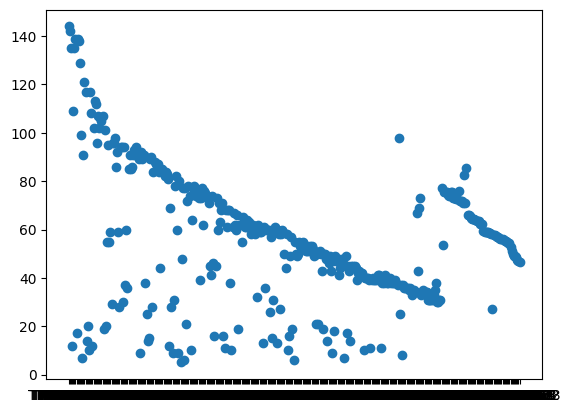

In [520]:
#scatter plot of RFS
plt.scatter(df['ID'], df['RelapseFreeSurvival (outcome)'])

In [659]:
df.shape

(400, 120)

In [660]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 120 entries, ID to original_ngtdm_Strength
dtypes: float64(108), int64(11), object(1)
memory usage: 375.1+ KB


### Find number of rows with null values

In [693]:
#replace '999' with NaN
df.replace(999, np.nan, inplace = True)

In [694]:
#print the total amount of NaN
print(df.isnull().sum(axis=1).sum() , "null values")

17 null values


Total number of null values in the dataset is 17.
The total number of rows in the dataset is 400 and 120 columns, therefore 17 is not a huge chunk of the dataset. It is okay to discard all rows containing a null value

### drop Na

In [695]:
#make dataframe drop Na
df.dropna(inplace = True)

In [696]:
#new dataframe shape
df.shape

(390, 120)

Resultant Shape of the data set has 390 rows, therefore we can conclude that only 10 rows contained null values and were removed. This means that very small chunk of the rows were removed compared to the dataset, thus preserving a good representation of the original data. Tried filling NaN with median, it gave worse results

### Check for duplicates

In [528]:
df.duplicated().unique()

array([False])

No duplicates were found

### Check Data types

In [529]:
df.dtypes

ID                                                     object
pCR (outcome)                                         float64
RelapseFreeSurvival (outcome)                         float64
Age                                                   float64
ER                                                      int64
PgR                                                   float64
HER2                                                  float64
TrippleNegative                                       float64
ChemoGrade                                            float64
Proliferation                                         float64
HistologyType                                         float64
LNStatus                                              float64
TumourStage                                             int64
original_shape_Elongation                             float64
original_shape_Flatness                               float64
original_shape_LeastAxisLength                        float64
original

The data type of all the columns are numerical only the ID is an object. The ID number will not be used in training the model therefore we do not need change it to numerical. 

# Outliers Handling

## boxplot

In [957]:
df.plot(kind = 'box', layout=(40,3),  figsize=(70,750), sharex = False, subplots=True)

pCR (outcome)                                            AxesSubplot(0.125,0.863891;0.227941x0.0161088)
RelapseFreeSurvival (outcome)                         AxesSubplot(0.398529,0.863891;0.227941x0.0161088)
Age                                                   AxesSubplot(0.672059,0.863891;0.227941x0.0161088)
ER                                                       AxesSubplot(0.125,0.844561;0.227941x0.0161088)
PgR                                                   AxesSubplot(0.398529,0.844561;0.227941x0.0161088)
HER2                                                  AxesSubplot(0.672059,0.844561;0.227941x0.0161088)
TrippleNegative                                           AxesSubplot(0.125,0.82523;0.227941x0.0161088)
ChemoGrade                                             AxesSubplot(0.398529,0.82523;0.227941x0.0161088)
Proliferation                                          AxesSubplot(0.672059,0.82523;0.227941x0.0161088)
HistologyType                                              AxesS

Error in callback <function _draw_all_if_interactive at 0x00000252F420A040> (for post_execute):


ValueError: Image size of 7000x75000 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 7000x75000 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 7000x75000 with 120 Axes>

### drop ID column from dataframe

In [698]:
df.drop('ID', axis = 1, inplace = True)

### detect outliers with quantile ranges and replace them with NaN

In [699]:
for column in df.drop('RelapseFreeSurvival (outcome)', axis=1):
    if df[column].nunique() >= 4:
        q3 = df[column].quantile(0.75)
        q1 = df[column].quantile(0.25)

        IQR = q3 - q1
    
        lower_limit = q1 - (IQR * 1.5)
    
        upper_limit = q3 + (IQR * 1.5)
            
        df[column].loc[df[column]>upper_limit] = np.nan
        df[column].loc[df[column]<lower_limit] = np.nan

C:\Users\Ga401\AppData\Local\Temp\ipykernel_17292\1379455703.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].loc[df[column]>upper_limit] = np.nan
C:\Users\Ga401\AppData\Local\Temp\ipykernel_17292\1379455703.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].loc[df[column]<lower_limit] = np.nan


In [700]:
#fill all the possible NaN with the mode
df.fillna(df.mode(), inplace = True)

In [701]:
#fill the rest of the NaN with the median
df.fillna(df.median(), inplace = True)

# Feature Selection

### Filter Features using Correlation

In [948]:
Fil_Corr = abs(df.corr()['RelapseFreeSurvival (outcome)'])

#Sort Each column in ascending order of Correlation Score
Fil_Corr.sort_values(ascending=True, inplace = True)

df_cor = df.copy()
df_cor.drop('RelapseFreeSurvival (outcome)', axis = 1, inplace = True)

for i in range(len(Fil_Corr)):
    #drop all column with has a lower correlation score than 0.1
    if Fil_Corr[i] < 0.12:
        df_cor.drop(Fil_Corr.index[i], axis = 1, inplace = True)
        
# make standardiser and Normalisationer
Xs_Cor = StandardScaler().fit(df_cor)
Xn_Cor = preprocessing.Normalizer().fit(df_cor)

In [949]:
df_cor.shape

(390, 11)

### Wrapper Method (Sequential Feature Selector (forward) )

In [909]:
from sklearn.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(estimator=LinearRegression(), 
                                         n_features_to_select = 30, cv =5,
                                         direction ='forward')

X = df.drop(['RelapseFreeSurvival (outcome)'], axis =1)
Y = df['RelapseFreeSurvival (outcome)']

sfs.fit(X, Y)

df_wrap = df[X.columns[sfs.get_support()]]

Xs_wrap = StandardScaler().fit(df_wrap)
Xn_wrap = preprocessing.Normalizer().fit(df_wrap)

In [901]:
df_wrap.shape

(390, 30)

### Feature Select using PCA

In [716]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=31)

df_pca = df.copy()

Xs_pca = StandardScaler().fit(df_pca.drop('RelapseFreeSurvival (outcome)', axis=1))

Xx = Xs_pca.transform(df_pca.drop('RelapseFreeSurvival (outcome)', axis=1))

X_pca = pca.fit_transform(Xx)

# Model Evaluation (K-Fold Evaluation) 

In order to find the best possible model to predict the outcome, we will do trail and error on every possible combinations of different feature selection methods and different machine learning models. Whilst fine tuning parameters to ensure every model is able to perform its best. Thus, we are able to compare the best version of each model together, to find the best of the best model to use on the testDataset.

## Logistic Regression

In [947]:
lr = LinearRegression(fit_intercept = True, positive = False)

#Correlation Filter Method
X_cor = Xs_Cor.transform(df_cor)    
#X_cor = df_cor
#do K fold Evaluation
LinearRegression_score_Corr = cross_val_score(lr , X_cor, Y, cv=5, scoring = 'neg_mean_absolute_error')
LinearRegression_score_mean_Corr = abs(LinearRegression_score_Corr.mean())

#Wrapper Method SFS Forward
X_wrap = Xs_wrap.transform(df_wrap) #standardise
#X_wrap = Xn_wrap.transform(df_wrap)
#X_wrap = df_wrap
#do K fold Evaluation
LinearRegression_score_wrap = cross_val_score(lr , X_wrap, Y, cv=5, scoring = 'neg_mean_absolute_error')
LinearRegression_score_mean_wrap = abs(LinearRegression_score_wrap.mean())

#PCA Feature Selection
#do K fold Evaluation
LinearRegression_score_pca = cross_val_score(lr, X_pca, Y, cv=5, scoring = 'neg_mean_absolute_error')
LinearRegression_score_mean_pca = abs(LinearRegression_score_pca.mean())

print("Corr:", LinearRegression_score_mean_Corr)
print("Wrap:", LinearRegression_score_mean_wrap)
print("PCA:", LinearRegression_score_mean_pca)

Corr: 22.884275864409858
Wrap: 21.38780629017254
PCA: 24.78200368133742


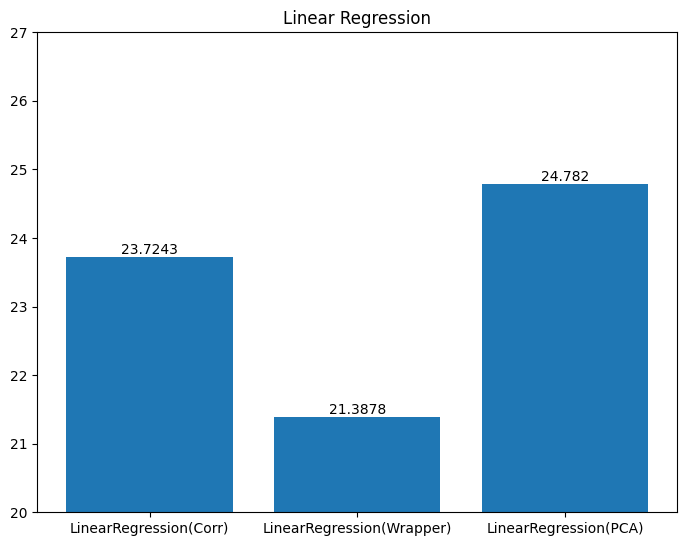

In [754]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model = ['LinearRegression(Corr)', 'LinearRegression(Wrapper)', 'LinearRegression(PCA)']
score = [LinearRegression_score_mean_Corr,LinearRegression_score_mean_wrap,LinearRegression_score_mean_pca]
bars = ax.bar(model,score)
ax.bar_label(bars)
plt.title("Linear Regression")
plt.ylim(20, 27)
plt.show()

Linear Regression using Wrapper method to do feature selection gave us the best result as it gave us the lowest mean absolute error

## Support Vector Regression

In [719]:
from sklearn.svm import SVR
svr = SVR(kernel = 'sigmoid',gamma = 'scale')

#Correlation Feature Selection
#X_cor = Xs_Cor.transform(df_cor)
#X_cor = Xn_Cor.transform(df_cor)
X_cor = df_cor
#do K fold Evaluation
svr_score_Corr = cross_val_score(svr , X_cor, Y, cv=5, scoring = 'neg_mean_absolute_error')
svr_score_mean_Corr = abs(svr_score_Corr.mean())

#Wrapper Method SFS Forward
X_wrap = Xs_wrap.transform(df_wrap)
#X_wrap = df_wrap
#do K fold Evaluation
svr_score_wrap = cross_val_score(svr , X_wrap, Y, cv=5, scoring = 'neg_mean_absolute_error')
svr_score_mean_wrap = abs(svr_score_wrap.mean())

#PCA Feature Selection
#do K fold Evaluation
svr_score_pca = cross_val_score(svr, X_pca, Y, cv=5, scoring = 'neg_mean_absolute_error')
svr_score_mean_pca = abs(svr_score_pca.mean())


print("Corr", abs(svr_score_mean_Corr))
print("Wrap", abs(svr_score_mean_wrap))
print("PCA", abs(svr_score_mean_pca))

Corr 22.261363194853693
Wrap 22.18770067884766
PCA 22.690946536465585


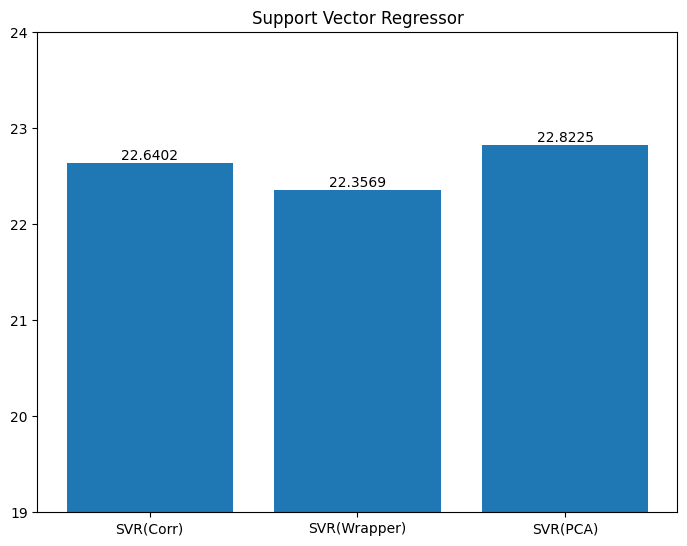

In [677]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model = ['SVR(Corr)', 'SVR(Wrapper)', 'SVR(PCA)']
score = [svr_score_mean_Corr, svr_score_mean_wrap, svr_score_mean_pca]
bars = ax.bar(model,score)
ax.bar_label(bars)
plt.ylim(19, 24)
plt.title("Support Vector Regressor")
plt.show()

Wrapper method gave us the best result

## Decision Tree 

In [678]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(criterion='absolute_error', max_depth=3,
                              splitter = 'best', min_samples_split = 5,
                             max_features = 'log2')

#Correlation Feature Selection
#X_cor = Xs_Cor.transform(df_cor)
X_cor = Xn_Cor.transform(df_cor)
#X_cor = df_cor
#do K fold Evaluation
decisionTree_score_Corr = cross_val_score(tree , X_cor, Y, cv=5, scoring = 'neg_mean_absolute_error')
decisionTree_score_mean_Corr = abs(decisionTree_score_Corr.mean())

#Wrapper Method SFS Forward
X_wrap = Xs_wrap.transform(df_wrap)
#X_wrap = Xn_wrap.transform(df_wrap)
#X_wrap = df_wrap
#do K fold Evaluation
decisionTree_score_wrap = cross_val_score(tree , X_wrap, Y, cv=5, scoring = 'neg_mean_absolute_error')
decisionTree_score_mean_wrap = abs(decisionTree_score_wrap.mean())

#PCA Feature Selection
#do K fold Evaluation
decisionTree_score_pca = cross_val_score(tree, X_pca, Y, cv=5, scoring = 'neg_mean_absolute_error')
decisionTree_score_mean_pca = abs(decisionTree_score_pca.mean())


print("Corr", abs(decisionTree_score_mean_Corr))
print("Wrap", abs(decisionTree_score_mean_wrap))
print("PCA", abs(decisionTree_score_mean_pca))

Corr 23.325520833333336
Wrap 23.44135416666667
PCA 24.531562500000003


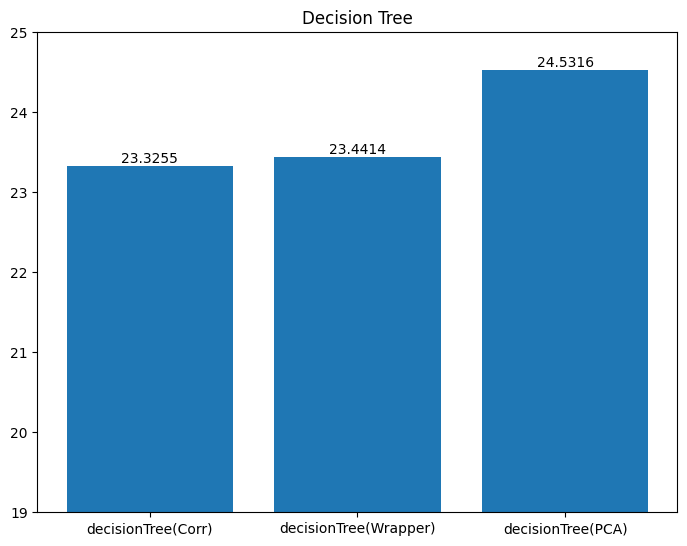

In [679]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model = ['decisionTree(Corr)', 'decisionTree(Wrapper)', 'decisionTree(PCA)']
score = [decisionTree_score_mean_Corr, decisionTree_score_mean_wrap, decisionTree_score_mean_pca]
bars = ax.bar(model,score)
ax.bar_label(bars)
plt.title("Decision Tree")
plt.ylim(19, 25)
plt.show()

Wrapper Method gave us best result for decision tree

## Multi-Layers Perceptron

In [680]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(activation = "logistic", solver='adam', alpha=0.01,
                     hidden_layer_sizes=(100), random_state=1, max_iter = 1000)

#Correlation Feature Selection
X_cor = Xs_Cor.transform(df_cor)
#X_cor = Xn_Cor.transform(df_cor)
#X_cor = df_cor
#do K fold Evaluation
network_score_Corr = cross_val_score(regr , X_cor, Y, cv=5, scoring = 'neg_mean_absolute_error')
network_score_mean_Corr = abs(network_score_Corr.mean())

#Wrapper Method SFS Forward
#X_wrap = Xs_wrap.transform(df_wrap)
X_wrap = Xn_wrap.transform(df_wrap)
#X_wrap = df_wrap
#do K fold Evaluation
network_score_wrap = cross_val_score(regr , X_wrap, Y, cv=5, scoring = 'neg_mean_absolute_error')
network_score_mean_wrap = abs(network_score_wrap.mean())

#PCA Feature Selection
#do K fold Evaluation
network_score_pca = cross_val_score(regr, X_pca, Y, cv=5, scoring = 'neg_mean_absolute_error')
network_score_mean_pca = abs(network_score_pca.mean())


print("Corr", abs(network_score_mean_Corr))
print("Wrap", abs(network_score_mean_wrap))
print("PCA", abs(network_score_mean_pca))

C:\Users\Ga401\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ga401\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ga401\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ga401\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ga401\anaconda3\lib\site-packages\sklearn\neural_network\_m

Corr 22.81516042158583
Wrap 22.30243638998878
PCA 24.39980492195344


C:\Users\Ga401\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


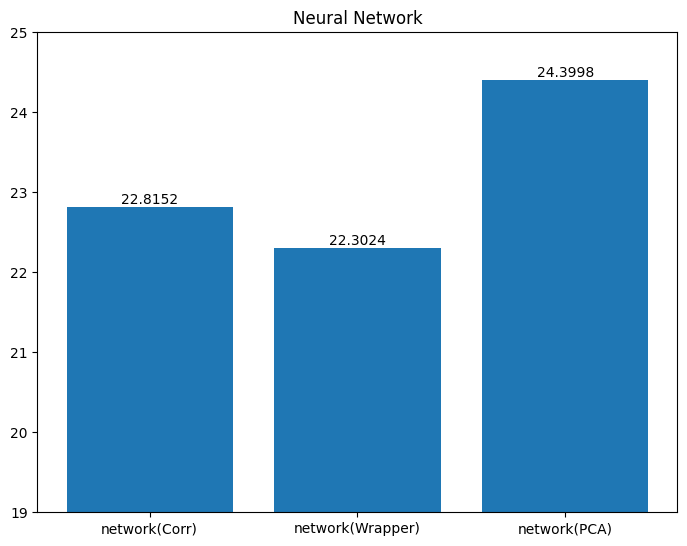

In [681]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model = ['network(Corr)', 'network(Wrapper)', 'network(PCA)']
score = [network_score_mean_Corr, network_score_mean_wrap, network_score_mean_pca]
bars = ax.bar(model,score)
ax.bar_label(bars)
plt.title("Neural Network")
plt.ylim(19, 25)
plt.show()

## Random Forest Regression

In [864]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators=50, criterion='absolute_error', max_depth = 20)

#Correlation Feature Selection
#X_cor = Xs_Cor.transform(df_cor)
X_cor = Xn_Cor.transform(df_cor)
#X_cor = df_cor
#do K fold Evaluation
RFR_score_Corr = cross_val_score(RFR , X_cor, Y, cv=5, scoring = 'neg_mean_absolute_error')
RFR_score_mean_Corr = abs(RFR_score_Corr.mean())

#Wrapper Method SFS Forward
X_wrap = Xs_wrap.transform(df_wrap)
#X_wrap = df_wrap
#do K fold Evaluation
RFR_score_wrap = cross_val_score(RFR , X_wrap, Y, cv=5, scoring = 'neg_mean_absolute_error')
RFR_score_mean_wrap = abs(RFR_score_wrap.mean())

#PCA Feature Selection
#do K fold Evaluation
RFR_score_pca = cross_val_score(RFR, X_pca, Y, cv=5, scoring = 'neg_mean_absolute_error')
RFR_score_mean_pca = abs(RFR_score_pca.mean())


print("Corr", abs(RFR_score_mean_Corr))
print("Wrap", abs(RFR_score_mean_wrap))
print("PCA", abs(RFR_score_mean_pca))

Corr 22.839649572649574
Wrap 22.466925213675214
PCA 23.201448717948715


## LASSO Regression

In [927]:
from sklearn import linear_model

lassoReg = linear_model.Lasso(alpha=0.03)

#Correlation Feature Selection
#X_cor = Xs_Cor.transform(df_cor)
#X_cor = Xn_Cor.transform(df_cor)
X_cor = df_cor
#do K fold Evaluation
lassoReg_score_Corr = cross_val_score(lassoReg , X_cor, Y, cv=5, scoring = 'neg_mean_absolute_error')
lassoReg_score_mean_Corr = abs(lassoReg_score_Corr.mean())

#Wrapper Method SFS Forward
X_wrap = Xs_wrap.transform(df_wrap)
#X_wrap = Xn_wrap.transform(df_wrap)
#X_wrap = df_wrap
#X_wrap = df.drop('RelapseFreeSurvival (outcome)', axis=1)
#do K fold Evaluation
lassoReg_score_wrap = cross_val_score(lassoReg , X_wrap, Y, cv=5, scoring = 'neg_mean_absolute_error')
lassoReg_score_mean_wrap = abs(lassoReg_score_wrap.mean())

#PCA Feature Selection
#do K fold Evaluation
lassoReg_score_pca = cross_val_score(lassoReg, X_pca, Y, cv=5, scoring = 'neg_mean_absolute_error')
lassoReg_score_mean_pca = abs(lassoReg_score_pca.mean())


print("Corr", abs(lassoReg_score_mean_Corr))
print("Wrap", abs(lassoReg_score_mean_wrap))
print("PCA", abs(lassoReg_score_mean_pca))

Corr 23.441271199603012
Wrap 21.32944851582085
PCA 24.730643843929293


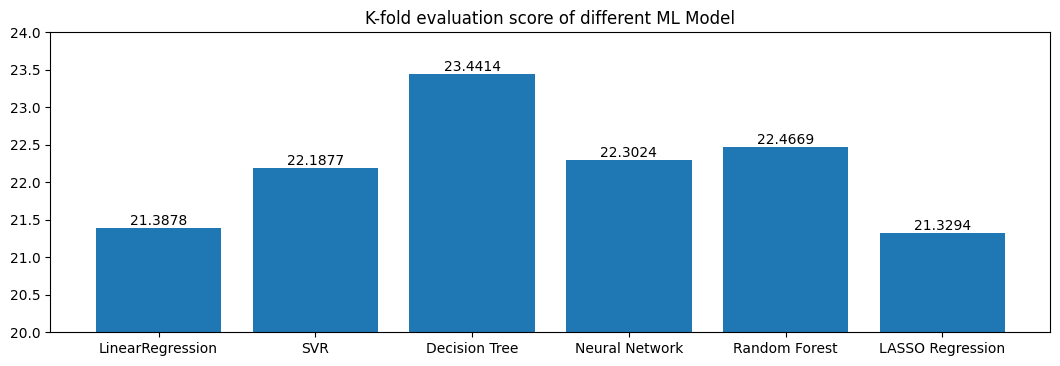

In [950]:
fig = plt.figure(figsize = (10,3))
ax = fig.add_axes([0,0,1,1])
model = ['LinearRegression', 'SVR', 'Decision Tree', "Neural Network", "Random Forest", "LASSO Regression"]
score = [LinearRegression_score_mean_wrap,svr_score_mean_wrap,decisionTree_score_mean_wrap, network_score_mean_wrap, RFR_score_mean_wrap, lassoReg_score_mean_wrap]
bars = ax.bar(model,score)
ax.bar_label(bars)
plt.title("K-fold evaluation score of different ML Model")
plt.ylim(20, 24)
plt.show()

Out of all the different feature selection methods, the forward wrapper method allowed us to get the best result out of all the methods. The final result using K-fold cross evaluation, we can say that the LASSO Regression method using wrapper method for feature selection allowed us to get the lowest possible mean absolute error at 21.3294 (standard scaler). But the Linear Regression model is extremely close at second place with 21.3878.

# Save RFS Model

In [953]:
X_wrap = df_wrap
X_wrap = pd.DataFrame(StandardScaler().fit_transform(X_wrap.values), columns=X_wrap.columns, index=X_wrap.index)

Y = df['RelapseFreeSurvival (outcome)']

In [954]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_wrap,Y, test_size=0.20, random_state=0)

In [955]:
lassoReg = linear_model.Lasso(alpha=0.03)
model = lassoReg.fit(X_train, y_train)


In [956]:
# Import pickle Package

import pickle

Pkl_Filename_RFS = "Pickle_RFS_Model.pkl" 

Feature_Selected = "Feature_Selected_RFS"

with open(Pkl_Filename_RFS, 'wb') as file:
    pickle.dump(model, file)
with open(Feature_Selected, 'wb') as file2:
    pickle.dump(X.columns[sfs.get_support()], file2)